## Hospital Treatments In Kerala

### The dataset contains information about 1,000 hospital treatments in Kerala, capturing various patient and treatment-related details. It includes attributes like age, gender, disease condition, treatment type, treatment cost, hospital stay duration, recovery outcome, and follow-up visits. The dataset shows a strong linear relationship (R² = 0.869) between treatment cost and hospital stay duration, making it suitable for predictive modeling. The data is balanced across genders and diverse medical conditions, ensuring broad applicability for analysis. This dataset is ideal for exploring healthcare trends, cost analysis, and predicting hospital stay durations.

#### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler


import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore",category=UserWarning)


#### Load The Dataset

In [2]:
data=pd.read_csv(r"C:\Users\Adithya\Downloads\Hospital_Treatments_Kerala.csv")
df=pd.DataFrame(data)
print(df.to_string())

    Patient_ID  Age  Gender Disease_Condition Treatment_Type  Treatment_Cost  Hospital_Stay_Duration Recovery_Outcome  Follow_up_Visits
0        P0001   56    Male       Respiratory     Medication    40572.940742                       8         Critical                 3
1        P0002   69    Male          Diabetes     Medication    10616.936629                       3        Recovered                 1
2        P0003   46  Female           Cardiac        Surgery    40739.479815                       9         Improved                 1
3        P0004   32    Male      Hypertension        Therapy    17409.540571                       3        Recovered                 0
4        P0005   60    Male           Cardiac        Surgery    44469.076146                       9        Recovered                 2
5        P0006   25  Female       Respiratory        Therapy    47481.894222                       7        Recovered                 1
6        P0007   78    Male      Hypertension   

#### Checking Information

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_ID              1000 non-null   object 
 1   Age                     1000 non-null   int64  
 2   Gender                  1000 non-null   object 
 3   Disease_Condition       1000 non-null   object 
 4   Treatment_Type          1000 non-null   object 
 5   Treatment_Cost          1000 non-null   float64
 6   Hospital_Stay_Duration  1000 non-null   int64  
 7   Recovery_Outcome        1000 non-null   object 
 8   Follow_up_Visits        1000 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB
None


#### Checking Null Value

In [4]:
data.isna()

,Patient_ID,Age,Gender,Disease_Condition,Treatment_Type,Treatment_Cost,Hospital_Stay_Duration,Recovery_Outcome,Follow_up_Visits
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


#### Cleaning Empty Cells

In [5]:
new_df=df.dropna(inplace=True)
print(new_df)

None


#### Correlation

In [6]:
print(df[['Treatment_Type','Treatment_Cost']])

    Treatment_Type  Treatment_Cost
0       Medication    40572.940742
1       Medication    10616.936629
2          Surgery    40739.479815
3          Therapy    17409.540571
4          Surgery    44469.076146
..             ...             ...
995     Medication    32436.384132
996        Therapy    36483.780633
997        Surgery    42716.973874
998     Medication    41126.492067
999        Surgery    48241.406612

[1000 rows x 2 columns]


#### Define features and target variable

In [7]:
X = df.drop(columns=["Patient_ID", "Hospital_Stay_Duration"])
y = df["Hospital_Stay_Duration"]


#### Categorical features

In [8]:
categorical_features = ["Gender", "Disease_Condition", "Treatment_Type", "Recovery_Outcome"]

####  Numerical features

In [9]:
numerical_features = ["Age", "Treatment_Cost", "Follow_up_Visits"]

#### Preprocessing for numerical data

In [10]:
numerical_transformer = StandardScaler()

####  Preprocessing for categorical data

In [11]:
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

#### Combine preprocessors in a column transformer

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

#### Define the model

In [13]:
model = RandomForestRegressor(random_state=42)

#### Create a pipeline that combines preprocessing and the model

In [14]:
pipeline = Pipeline(steps=[("preprocessor",preprocessor), ("model", model)])

#### Split data into training and test sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train the model

In [17]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Treatment_Cost',
                                                   'Follow_up_Visits']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'Disease_Condition',
                                                   'Treatment_Type',
                                                   'Recovery_Outcome'])])),
                ('model', RandomForestRegressor(random_state=42))])

#### Make predictions

In [17]:
y_pred = pipeline.predict(X_test)


#### Evaluate the model

In [18]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 1.06
R² Score: 0.87


#### Scatterplot

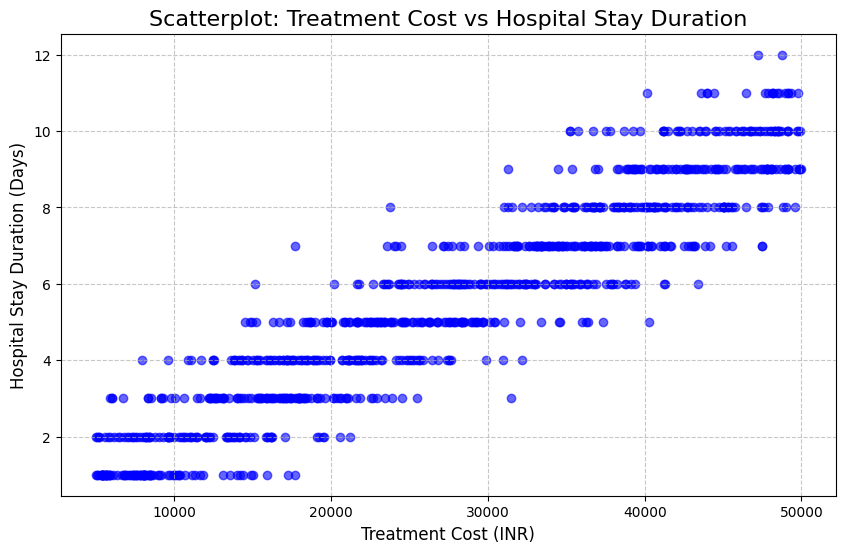

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Treatment_Cost"], df["Hospital_Stay_Duration"], alpha=0.6, color="blue")
plt.title("Scatterplot: Treatment Cost vs Hospital Stay Duration", fontsize=16)
plt.xlabel("Treatment Cost (INR)", fontsize=12)
plt.ylabel("Hospital Stay Duration (Days)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()